#### Ahmed Mohamed | Ahmed.H.H.Mohamed@gmail.com

# CS | OOP Programming

### Rendering "CSLSI"

If you use your solution to render the string "CSLSI", the result should look similar to this example.

In this exercise, you should design and implement three classes that can work together to render a string to an image, in a given font size. This task is meant to be solved in a team, such that each team member is responsible for one of the classes.

- The first class **Curve** should be able to represent a polygonal curve as a sequence of points in the plane. It should at least provide methods to add and remove points, to translate the curve by a given 2D vector, to scale it by a given factor, and to compute a tight axis-aligned bounding box around the curve. (4P)

- Instances of the second class **Character** should represent a letter from the alphabet, which is specified during instantiation, as a suitable set of polygons. To save you the work of having to design your own font, we provide a JSON file that includes a polygonal representation of each letter. The class should permit translating and scaling the letter, and computing its bounding box. (4P)

- A third class **Text** should represent a given string by creating corresponding **Character** objects and arranging them next to each other. It should also permit changing the font size by scaling the overall text, and have a method to render it into an image. For rendering, feel free to use the matplotlib Python package. (4P)


In [1]:
# Import Libraries

import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
class Curve:
    '''a list of points (x,y)'''
    def __init__(self, pts_list):
        '''Initiation of the Curve attributes'''
        self.coordinates = pts_list     # Curve points coordinates (x,y)
        self.min_x, self.min_y, self.max_x, self.max_y = self.aabb()    # Set AABB Values
    
    def add_co(self, point_coordinate):
        '''adding a point coordinates to the object coordinates attribute'''
        self.coordinates.append(point_coordinate)

    def remove_co(self, point_coordinate):
        '''remove a point coordinates from the object coordinates attribute'''
        self.coordinates.remove(point_coordinate)

    def edit_co(self, ind, point_coordinate):
        '''Edit a point coordinates using index'''
        self.coordinates[ind] = point_coordinate

    def scal_co(self, scalar):
        '''Scalling Curve Coordinates by a scalar and recalculate AABB values.'''
        self.coordinates = [[x * scalar, y * scalar] for x,y in self.coordinates]
        self.min_x, self.min_y, self.max_x, self.max_y = self.aabb()

    def trans_2D(self):
        '''Rendering the Curve to a 2D graph.'''

        xs, ys = zip(*self.coordinates) #create lists of x and y values

        plt.fill(xs,ys, color='black')  # Plotting the x and y values
        plt.show()

    def show(self):
        '''return the coordinates of the curve'''
        return deepcopy(self.coordinates)
    
    def aabb(self):
        '''Calculating axis-aligned bounding box around the curve.'''
        xs = [i[0] for i in self.coordinates]   # get x values in a list
        ys = [i[1] for i in self.coordinates]   # get y values in a list

        return [min(xs), min(ys), max(xs), max(ys)]
    
    def padding(self, p_factor):
        '''Add padding to the left on the x-axis and return a padded copy of coordinates'''
        return [[x + p_factor, y] for x,y in deepcopy(self.coordinates)]

In [3]:
# assign the JSON Data into a Dictionary

import json
with open(r'C:\Users\Ahmed Hossam\Documents\Life Science Informatics Documents\LSI Material\Winter Semester 23-24\CS for LSI Students\Exercises\Assignment 6\cslsi-assignment-06\cslsi-assignment-06\letters_geo.json', 'r') as json_file:
    characters_dict = json.loads(json_file.read())

characters_dict

{'A': [[[0.26745098039215687, 0.8533333333333334],
   [0.3796078431372549, 0.8533333333333334],
   [0.5988235294117648, 0.0],
   [0.49019607843137253, 0.0],
   [0.26745098039215687, 0.8533333333333334]],
  [[0.021568627450980392, 0.0],
   [0.23254901960784313, 0.7996078431372549],
   [0.27725490196078434, 0.6294117647058823],
   [0.19294117647058823, 0.30117647058823527],
   [0.36392156862745095, 0.30117647058823527],
   [0.3843137254901961, 0.22588235294117648],
   [0.17215686274509803, 0.22588235294117648],
   [0.11803921568627451, 0.0],
   [0.021568627450980392, 0.0]]],
 'B': [[[0.2203921568627451, 0.7486274509803922],
   [0.2203921568627451, 0.8533333333333334],
   [0.44941176470588234, 0.8533333333333334],
   [0.5686274509803921, 0.7321568627450981],
   [0.5686274509803921, 0.5372549019607843],
   [0.49137254901960786, 0.4533333333333333],
   [0.5745098039215686, 0.3611764705882353],
   [0.5745098039215686, 0.12549019607843137],
   [0.44823529411764707, 0.0],
   [0.220392156862745

In [4]:
class Character:
    '''List of Curves that represent the charater'''
    def __init__(self, character, map):
        '''initiation of the Charater attributes, takes the Letter
                and the map used to get the coordinates of the curves
                    that represent this Letter'''
        self.letter = character     # The Letter
        self.curves = [Curve(c) for c in map[character.upper()]]    # a list of Curves that represent the Letter
        self.min_x, self.min_y, self.max_x, self.max_y = self.aabb()    # Calculate AABB of the Character
        self.fontsize = 1   # Default font is 1

    def font(self, fs):
        '''Set a new font to the Character by scalling the original curvers
            by the factor of the new and the old font sizes'''
        assert fs != 0      # assert fontsize not equal 0
        
        for cur in self.curves:     # Scalling each curve by the factor.
            cur.scal_co(fs / self.fontsize)

        self.fontsize = fs      # set the character fontsize to the new fs
        self.min_x, self.min_y, self.max_x, self.max_y = self.aabb()    # Recalculate AABB

    def trans_2D(self):
        '''Rendering Character to 2D Graph.'''

        fig, ax = plt.subplots()
        for curv in self.curves:    # plotting curve by curve using subplots.
            xs, ys = zip(*curv.coordinates)
            ax.fill(xs, ys, color= 'black')
            ax.set_xlim([0,30])
            ax.set_ylim([0,10])

    def show(self):
        '''return a copy of curves coordinates'''
        curves_ls = [cur.show() for cur in self.curves]
        return curves_ls
    
    def padding(self, p_factor):
        ''' add padding to the left of the character on the x-axis'''
        for curv in self.curves:
            curv.padding(p_factor)

    def aabb(self):
        ''' Calculating AABB by geting the min and max of min
        and max values of x and y values for all curves'''

        return [min([curv.min_x for curv in self.curves]), min([curv.min_y for curv in self.curves]), max([curv.max_x for curv in self.curves]), max([curv.max_y for curv in self.curves])]

In [5]:
char = Character('S', characters_dict)

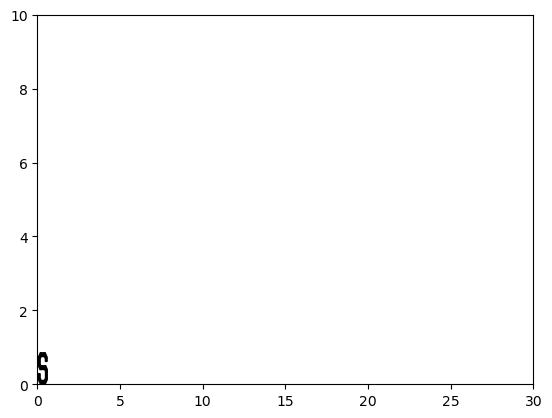

In [6]:
char.trans_2D()

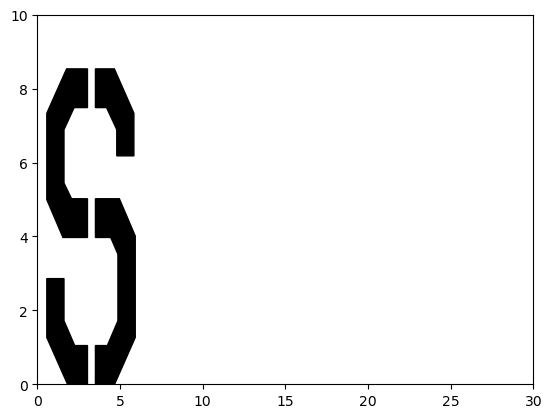

In [7]:
char.font(10)
char.trans_2D()

In [8]:
class Text:
    ''' a list of characters'''
    def __init__(self, text):
        ''' convert a text to a list of characters'''
        self.charaters = [Character(c, characters_dict) for c in text]

    def show(self):
        '''Represent the text in 2D graph'''

        start_x = 0     # the starting rendering point on x axis

        fig, ax = plt.subplots()    # using Subplots, plot each character curve by curve
        for char in self.charaters:
            for curv in char.curves:
                xs, ys = zip(*curv.padding(start_x))    # padding to avoide over-rendering of characters
                ax.fill(xs, ys, color= 'black')
                ax.set_xlim([0,30])
                ax.set_ylim([0,10])

            start_x += char.max_x   # setting the new starting point to the max x value of the character

    def font(self, fontsize):
        '''set the font of the text by setting the fonts of the characters'''
        for char in self.charaters:
            char.font(fontsize)


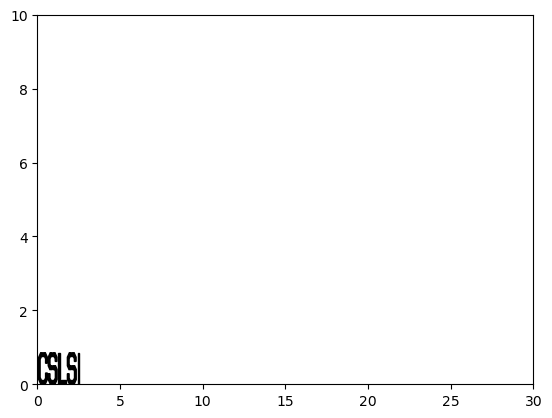

In [9]:
text1 = Text('cslsi')

text1.show()

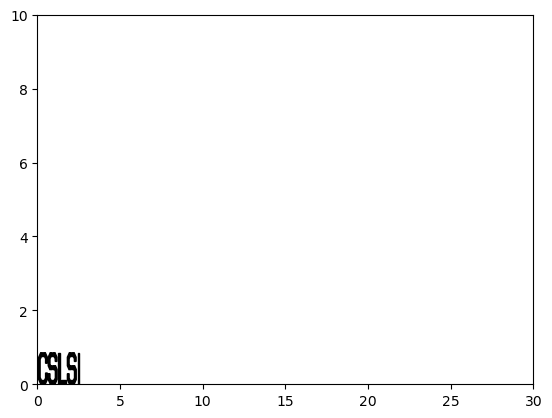

In [10]:
text1.font(1) # remember : the default font is 1. Nothing will change

text1.show()

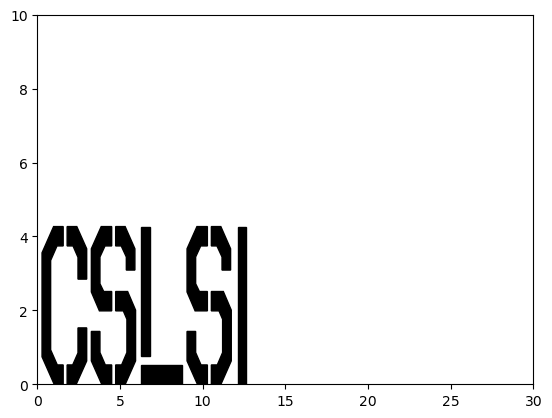

In [11]:
text1.font(5)

text1.show()

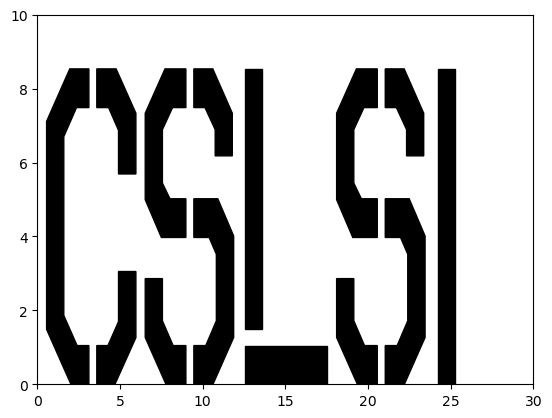

In [12]:
text1.font(10)

text1.show()

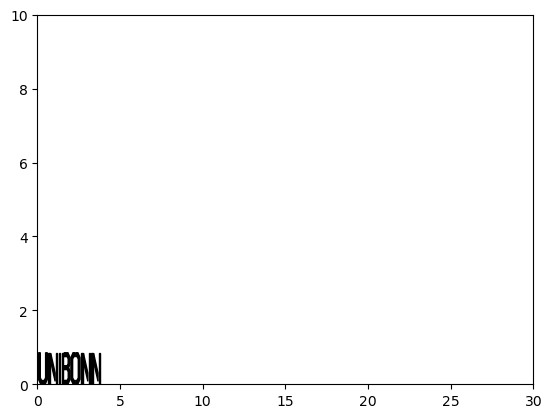

In [13]:
text2 = Text('UniBonn')

text2.show()

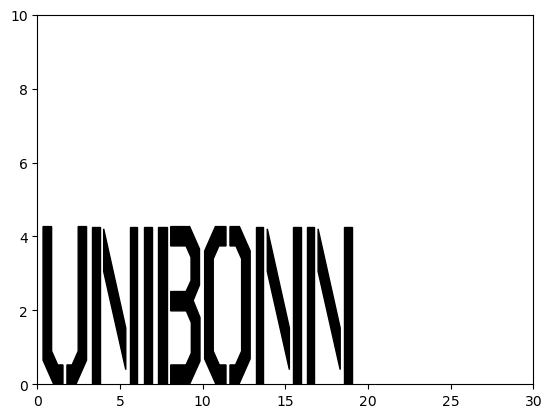

In [14]:
text2.font(5)

text2.show()